In [ ]:
'''
Dataset: Mental Health Corpus
Link: https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus/
Description: The Mental Health Corpus is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not.
Target labels: 0 or 1 (1 means considered as a comment which is poisonous with mental health issues, and 0 means not considered.)
'''

'\nDataset: Mental Health Corpus\nLink: https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus/\nDescription: The Mental Health Corpus is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not.\nTarget labels: 0 or 1 (1 means considered as a comment which is poisonous with mental health issues, and 0 means not considered.)\n'

Importing Required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from wordcloud import WordCloud

Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/mental_health.csv')

In [ ]:
df.head(10)

,text,label
0,dear american teens question dutch person hear...,0.0
1,nothing look forward lifei dont many reasons k...,1.0
2,music recommendations im looking expand playli...,0.0
3,im done trying feel betterthe reason im still ...,1.0
4,worried year old girl subject domestic physic...,1.0
5,hey rredflag sure right place post this goes ...,1.0
6,feel like someone needs hear tonight feeling r...,0.0
7,deserve liveif died right noone would carei re...,1.0
8,feels good ive set dateim killing friday nice ...,1.0
9,live guiltok made stupid random choice its ge...,1.0


Dropping Null values

In [ ]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis=0, inplace = True)
print(df.shape)

(11128, 2)
True
(11127, 2)


Removing duplicates

In [ ]:
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

In [ ]:
print(df.shape)
df.head(10)

(11127, 2)


,text,label
0,dear american teens question dutch person hear...,0.0
1,nothing look forward lifei dont many reasons k...,1.0
2,music recommendations im looking expand playli...,0.0
3,im done trying feel betterthe reason im still ...,1.0
4,worried year old girl subject domestic physic...,1.0
5,hey rredflag sure right place post this goes ...,1.0
6,feel like someone needs hear tonight feeling r...,0.0
7,deserve liveif died right noone would carei re...,1.0
8,feels good ive set dateim killing friday nice ...,1.0
9,live guiltok made stupid random choice its ge...,1.0


Visualizing Data

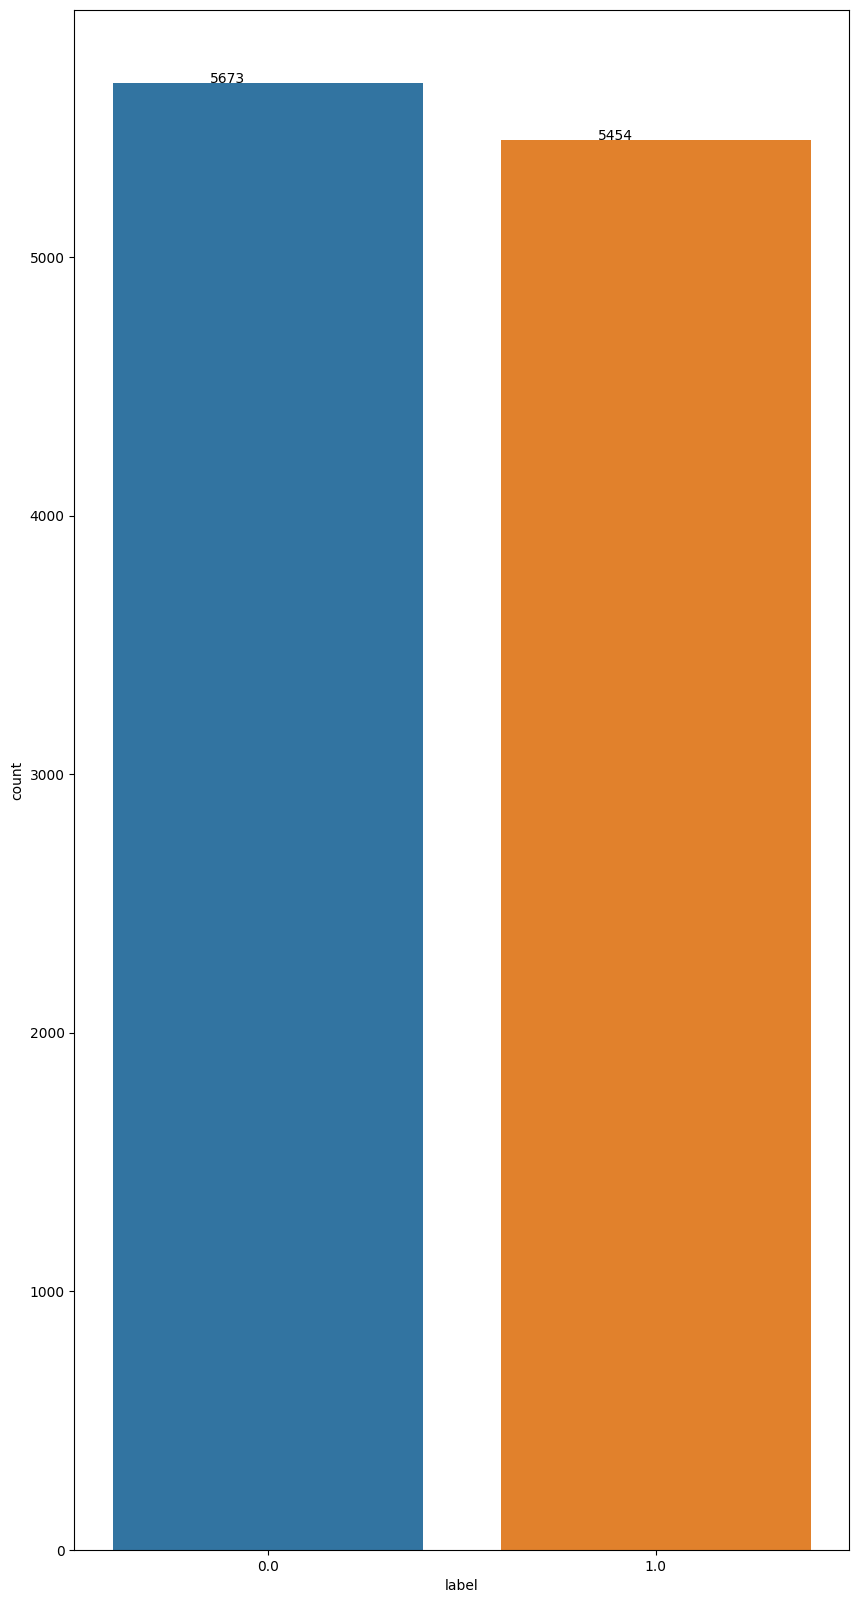

In [ ]:
plt.figure(figsize=(10,20))
ax=sns.countplot(x=df['label'],data=df, order=df['label'].value_counts().index)
for p, label in zip(ax.patches,df['label'].value_counts()):
  ax.annotate(label,(p.get_x()+0.25,p.get_height()+0.5))

In [ ]:
df.groupby('label').count()

,text
label,
0.0,5673
1.0,5454


Cleaning the Texts

In [ ]:
import nltk
from nltk. tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def remove_Stopwords(text):
  stop_words=set(stopwords.words('english'))
  words=word_tokenize(text.lower())
  sentence=[w for w in words if not w in stop_words]
  return ' '.join(sentence)

def lemmatize_text(text):
  wordlist=[]
  lemmatizer=WordNetLemmatizer()
  sentences=sent_tokenize(text)
  for sentence in sentences:
    words=word_tokenize(sentence)
    for word in words:
      wordlist.append(lemmatizer.lemmatize(word))
  return ' '.join(wordlist)

def clean_text(text):
  delete_dict={sp_character: '' for sp_character in string.punctuation}
  delete_dict[' ']=' '
  table = str.maketrans(delete_dict)
  text1=text.translate(table)
  textArr=text1.split()
  text2=' '.join([w for w in textArr])

  return text2.lower()


In [ ]:
label_0=df[df['label'] == 0.0]
label_1=df[df['label'] == 1.0]

In [ ]:
print(len(label_0))
print(len(label_1))

5673
5454


In [ ]:
label_0['text']=label_0['text'].apply(clean_text)
label_0['text']=label_0['text'].apply(remove_Stopwords)
label_0['text']=label_0['text'].apply(lemmatize_text)

<ipython-input-20-124d78ca4a88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_0['text']=label_0['text'].apply(clean_text)
<ipython-input-20-124d78ca4a88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_0['text']=label_0['text'].apply(remove_Stopwords)
<ipython-input-20-124d78ca4a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
label_1['text']=label_1['text'].apply(clean_text)
label_1['text']=label_1['text'].apply(remove_Stopwords)
label_1['text']=label_1['text'].apply(lemmatize_text)

<ipython-input-21-c38df461831f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_1['text']=label_1['text'].apply(clean_text)
<ipython-input-21-c38df461831f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_1['text']=label_1['text'].apply(remove_Stopwords)
<ipython-input-21-c38df461831f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Finding the number of words in texts for different target labels

In [ ]:
label_0['Num_words_text']=label_0['text'].apply(lambda x: len(str(x).split()))
label_1['Num_words_text']=label_1['text'].apply(lambda x: len(str(x).split()))

<ipython-input-22-0d57941f48c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_0['Num_words_text']=label_0['text'].apply(lambda x: len(str(x).split()))
<ipython-input-22-0d57941f48c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_1['Num_words_text']=label_1['text'].apply(lambda x: len(str(x).split()))


In [ ]:
label_0['Num_words_text'].describe()

count    5673.000000
mean       45.118808
std        67.778202
min         0.000000
25%        11.000000
50%        21.000000
75%        53.000000
max      1432.000000
Name: Num_words_text, dtype: float64

In [ ]:
label_1['Num_words_text'].describe()

count    5454.000000
mean       92.912175
std       118.420014
min         1.000000
25%        29.000000
50%        59.000000
75%       113.000000
max      1967.000000
Name: Num_words_text, dtype: float64

Visualizing texts using Word cloud

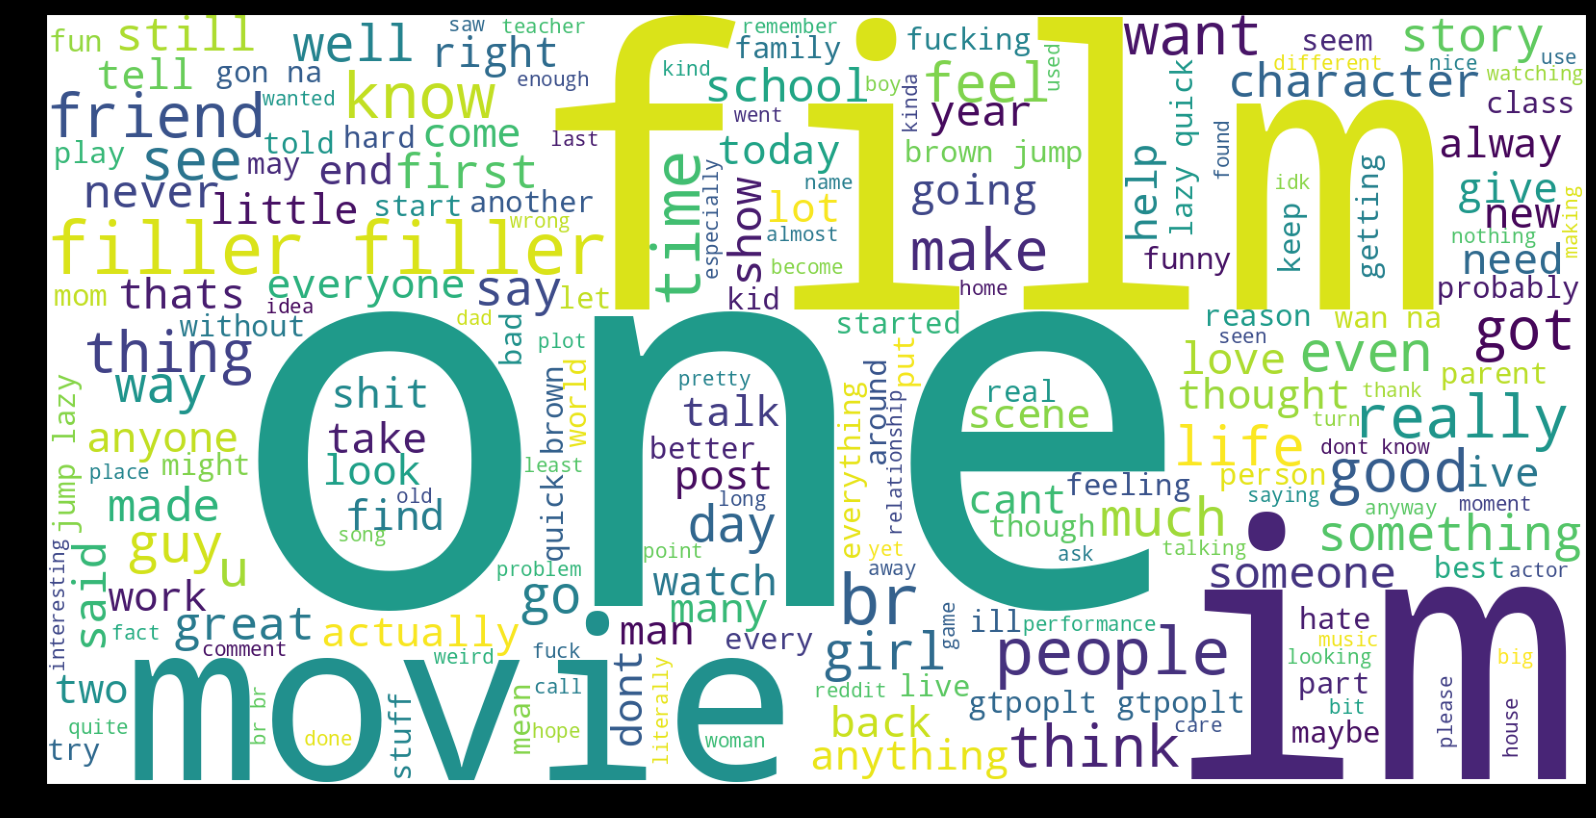

In [ ]:
wordcloud=WordCloud(background_color='white', width=1600, height=800).generate(' '.join(label_0['text'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

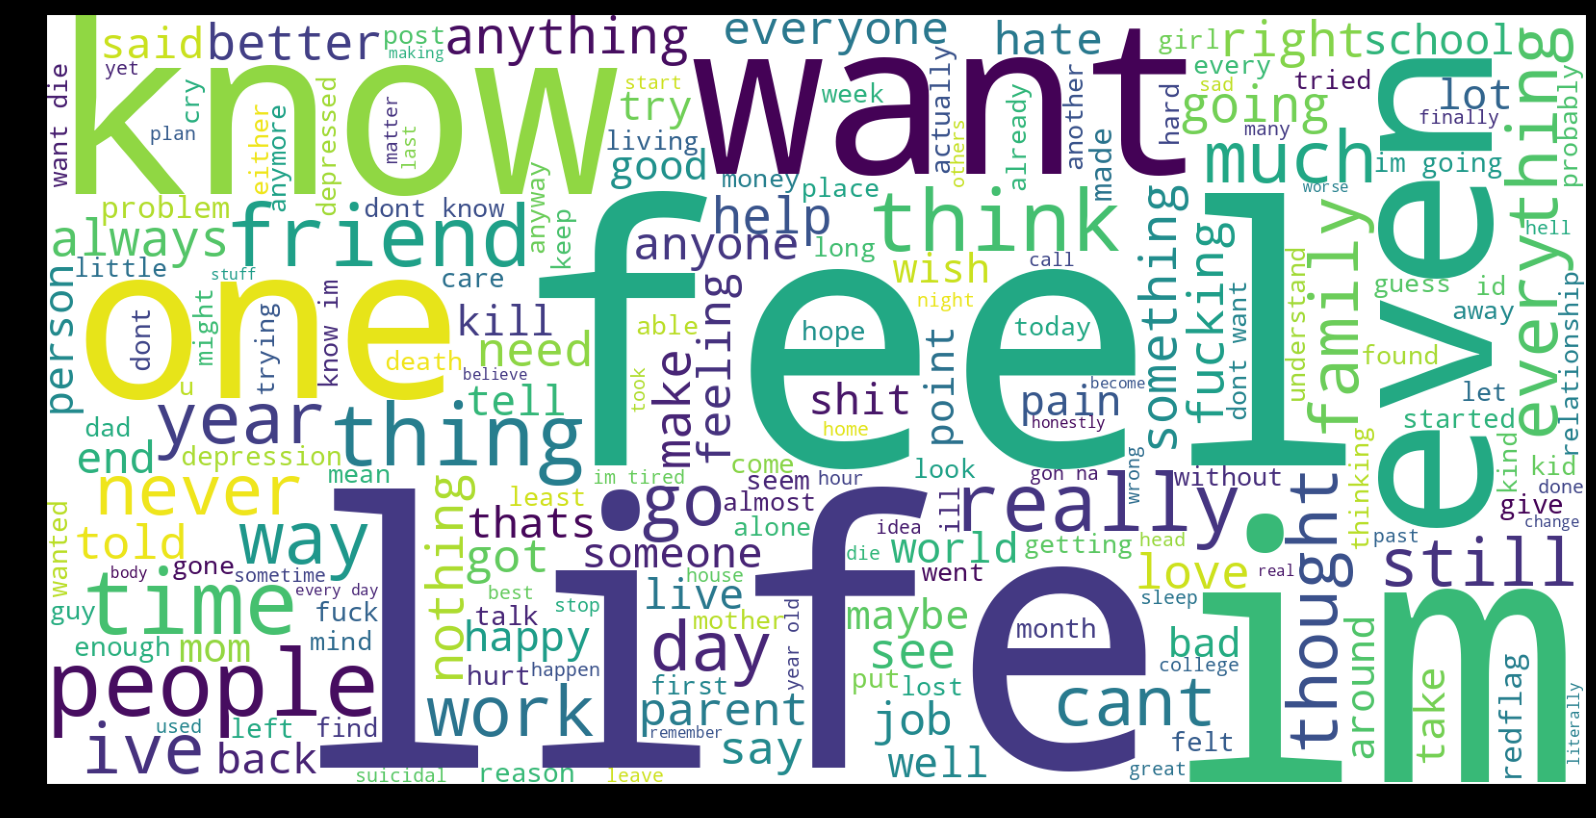

In [ ]:
wordcloud=WordCloud(background_color='white', width=1600, height=800).generate(' '.join(label_1['text'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

### Zero-Shot Classification

In [ ]:
!pip install -q transformers

In [ ]:
df

,text,label
0,dear american teens question dutch person hear...,0.0
1,nothing look forward lifei dont many reasons k...,1.0
2,music recommendations im looking expand playli...,0.0
3,im done trying feel betterthe reason im still ...,1.0
4,worried year old girl subject domestic physic...,1.0
...,...,...
11122,whyim breaking point mentally emotionally phys...,1.0
11123,got drama assignment idk help dumb recreate sc...,0.0
11124,saw something utterly disgusting comment secti...,0.0
11125,hey you ya you add discord lets talk preferab...,0.0


In [ ]:
from transformers import BartForSequenceClassification, BartTokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-mnli')
model = BartForSequenceClassification.from_pretrained('facebook/bart-large-mnli')

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [ ]:
premises = df['text'].to_list()
candidate_labels = ['mental health issues', 'stable mental health']
hypothesis = 'The person has {}'
hypotheses = []
for label in candidate_labels:
  hypotheses.append(hypothesis.format(label))

In [ ]:
#Don't run again
input_ids = []
probs = []
maxlength = tokenizer.model_max_length
max_word_length = 100
for i in range(len(premises)):
    input_ids.append(tokenizer.encode(premises[i], hypotheses[0], return_tensors='pt'))
for j in range(len(input_ids)):
    if tokenizer.encode(premises[j], hypotheses[0], add_special_tokens=True, return_tensors='pt').shape[1] < maxlength:
        logits = model(input_ids[j])[0]
        entail_contradict_logits = logits[:, [0,2]] #neutral is removed
        prob = entail_contradict_logits.softmax(dim=1)
        entail_prob = prob[:,1].item()*100
        probs.append(entail_prob)
    else:
        chunked_texts = []
        text_chunks = premises[j].split(" ")
        text_chunks = [word for word in text_chunks if word]
        for word in text_chunks:
            if len(word) > max_word_length:
                split_words = [word[i:i + max_word_length] for i in range(0, len(word), max_word_length)]
                for split_word in split_words:
                    text_chunks.insert(text_chunks.index(word), split_word)
                text_chunks.remove(word)
        current_chunk = " "
        for word in text_chunks:
            if tokenizer.encode(current_chunk + word + " ", hypotheses[0], add_special_tokens=True, return_tensors='pt').shape[1] < maxlength:
                current_chunk += word + " "
            else:
                chunked_texts.append(current_chunk.strip())
                current_chunk = word + " "
        if current_chunk:
            chunked_texts.append(current_chunk.strip())
        chunk_probs = []
        for chunk in chunked_texts:
            input_id = tokenizer.encode(chunk, hypotheses[0], add_special_tokens=True, return_tensors='pt')
            logits = model(input_id)[0]
            entail_contradict_logits = logits[:, [0,2]]
            prob = entail_contradict_logits.softmax(dim=1)
            entail_prob = prob[:, 1].item()*100
            chunk_probs.append(entail_prob)
        probs.append(max(chunk_probs))

In [ ]:
#Don't run again
results = pd.DataFrame({'Text': premises, 'Probability of user having mental health issues' : probs, 'Label' : df['label'].to_numpy()})
results

In [ ]:
#Don't run again
#Saving the results as a csv file
results.to_csv('/kaggle/working/results.csv', index=False)

In [ ]:
#Import results from the file
results = pd.read_csv('/content/results.csv')
results

,Text,Probability of user having mental health issues,Label
0,dear american teens question dutch person hear...,8.695895,0
1,nothing look forward lifei dont many reasons k...,97.823524,1
2,music recommendations im looking expand playli...,3.340815,0
3,im done trying feel betterthe reason im still ...,99.957389,1
4,worried year old girl subject domestic physic...,99.676836,1
...,...,...,...
27967,posting everyday people stop caring religion ...,19.281597,0
27968,okay definetly need hear guys opinion ive pret...,74.231112,0
27969,cant get dog think ill kill myselfthe last thi...,86.777604,1
27970,whats point princess bridei really think like ...,83.447284,1


In [ ]:
#Setting a threshold of 50% above which the user has mental health issues(Predicted Label = 1). Else user has stable mental health (Predicted Label = 0)
threshold = 50.0
predicted_labels = results['Probability of user having mental health issues'].to_numpy()
predicted_labels = [0  if predicted_label < threshold else 1 for predicted_label in predicted_labels]
zero_shot_final_results = pd.DataFrame({'Text' : results['Text'].to_numpy(), 'Predicted Label' : predicted_labels, 'Actual Label' : results['Label'].to_numpy()})

In [ ]:
zero_shot_final_results

,Text,Predicted Label,Actual Label
0,dear american teens question dutch person hear...,0,0
1,nothing look forward lifei dont many reasons k...,1,1
2,music recommendations im looking expand playli...,0,0
3,im done trying feel betterthe reason im still ...,1,1
4,worried year old girl subject domestic physic...,1,1
...,...,...,...
27967,posting everyday people stop caring religion ...,0,0
27968,okay definetly need hear guys opinion ive pret...,1,0
27969,cant get dog think ill kill myselfthe last thi...,1,1
27970,whats point princess bridei really think like ...,1,1


In [ ]:
from sklearn.metrics import confusion_matrix
zero_shot_cm = confusion_matrix(zero_shot_final_results['Actual Label'].to_numpy(), zero_shot_final_results['Predicted Label'].to_numpy())

Text(0.5, 1.0, 'Confusion matrix of the Zero-Shot Classification Model')

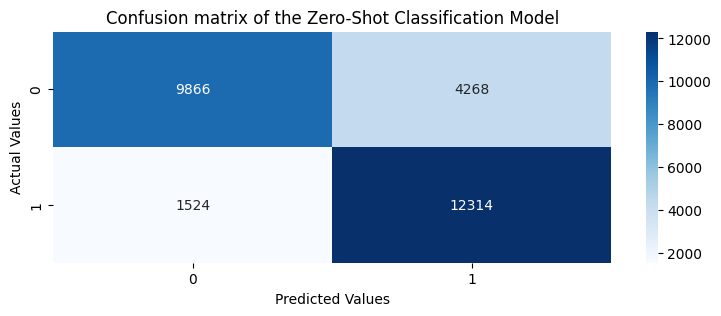

In [ ]:
from matplotlib import pyplot
import seaborn as sns
pyplot.figure(figsize=(9,3))
zero_shot_cm_plot = sns.heatmap(zero_shot_cm, annot=True, cmap='Blues', fmt='d')
zero_shot_cm_plot.set_xlabel('Predicted Values')
zero_shot_cm_plot.set_ylabel('Actual Values')
zero_shot_cm_plot.set_title('Confusion matrix of the Zero-Shot Classification Model')

In [ ]:
#Calculating the accuracy of the Zero-Shot Model
#Accuracy = (TP+TN)/(TP+TN+FP+FN)
zero_shot_accuracy = sum(zero_shot_cm.diagonal()) / zero_shot_cm.sum()
#Recall = TP / (TP+FN)
zero_shot_recall = zero_shot_cm[1][1] / sum(zero_shot_cm[1])
#Precision = TP / (TP+FP)
zero_shot_precision = zero_shot_cm[1][1] / sum(zero_shot_cm.T[1])
#F1 Score = (2*Precision*Recall)/(Precision + Recall)
zero_shot_f1_score = (2 * zero_shot_precision * zero_shot_recall) / (zero_shot_precision + zero_shot_recall)
print('The Accuracy of the Zero-Shot model is {}'.format(zero_shot_accuracy))
print('The Recall of the Zero-Shot model is {}'.format(zero_shot_recall))
print('The Precision of the Zero-Shot model is {}'.format(zero_shot_precision))
print('The F1 Score of the Zero-Shot model is {}'.format(zero_shot_f1_score))

The Accuracy of the Zero-Shot model is 0.792935792935793
The Recall of the Zero-Shot model is 0.8898684781037722
The Precision of the Zero-Shot model is 0.7426124713544807
The F1 Score of the Zero-Shot model is 0.8095989480604864


### Few-Shot Classification

Same code ran for different train sets consisting of k samples from each class. K ranging from 1 to 10

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
train=pd.read_csv('/content/train1_nlp.csv')
test=pd.read_csv('/content/test_nlp.csv')

In [ ]:
print(test.shape)

(27957, 2)


In [ ]:
train.head()

,text,label
0,nothing look forward lifei dont many reasons k...,1
1,im done trying feel betterthe reason im still ...,1
2,worried year old girl subject domestic physic...,1
3,hey rredflag sure right place post this goes ...,1
4,feels good ive set dateim killing friday nice ...,1


In [ ]:
train.label.value_counts()

1    10
0    10
Name: label, dtype: int64

In [ ]:
train_form = train

In [ ]:
train_form['label_full'] = pd.DataFrame(train_form['label'].replace(0,'Not Poisonous').replace(1,'Poisonous'))

In [ ]:
train_form.head()

,text,label,label_full
0,nothing look forward lifei dont many reasons k...,1,Poisonous
1,im done trying feel betterthe reason im still ...,1,Poisonous
2,worried year old girl subject domestic physic...,1,Poisonous
3,hey rredflag sure right place post this goes ...,1,Poisonous
4,feels good ive set dateim killing friday nice ...,1,Poisonous


In [ ]:
!pip install git+https://github.com/pmbaumgartner/setfit -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from setfit import SetFitClassifier

In [ ]:
# takes a sentence-transformers model
clf = SetFitClassifier("paraphrase-MiniLM-L3-v2")

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
docs = train_form['text'].to_list()
labels = train_form['label_full'].to_list()

In [ ]:
# fine-tunes embeddings + trains logistic regression head
clf.fit(docs, labels)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
test['label_full'] = pd.DataFrame(test['label'].replace(0,'Not Poisonous').replace(1,'Poisonous'))

In [ ]:
test

,text,label,label_full
0,want die even tho feels like dead yearshello e...,1,Poisonous
1,im barely holding oni night prolonged panic at...,1,Poisonous
2,me think think lost matter point never felt wa...,1,Poisonous
3,every success ever life come extremely lucky h...,1,Poisonous
4,emptynever know time gonna up id admit mental ...,1,Poisonous
...,...,...,...
27952,back school guess ive coop goat farm quad tod...,0,Not Poisonous
27953,hell sounds better heaven heaven pray shit hel...,0,Not Poisonous
27954,posting everyday people stop caring religion ...,0,Not Poisonous
27955,okay definetly need hear guys opinion ive pret...,0,Not Poisonous


In [ ]:
test['predicted'] = clf.predict(test['text'].to_list())

In [ ]:
test

,text,label,label_full,predicted
0,want die even tho feels like dead yearshello e...,1,Poisonous,Poisonous
1,im barely holding oni night prolonged panic at...,1,Poisonous,Poisonous
2,me think think lost matter point never felt wa...,1,Poisonous,Poisonous
3,every success ever life come extremely lucky h...,1,Poisonous,Poisonous
4,emptynever know time gonna up id admit mental ...,1,Poisonous,Poisonous
...,...,...,...,...
27952,back school guess ive coop goat farm quad tod...,0,Not Poisonous,Not Poisonous
27953,hell sounds better heaven heaven pray shit hel...,0,Not Poisonous,Not Poisonous
27954,posting everyday people stop caring religion ...,0,Not Poisonous,Poisonous
27955,okay definetly need hear guys opinion ive pret...,0,Not Poisonous,Poisonous


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer as cv

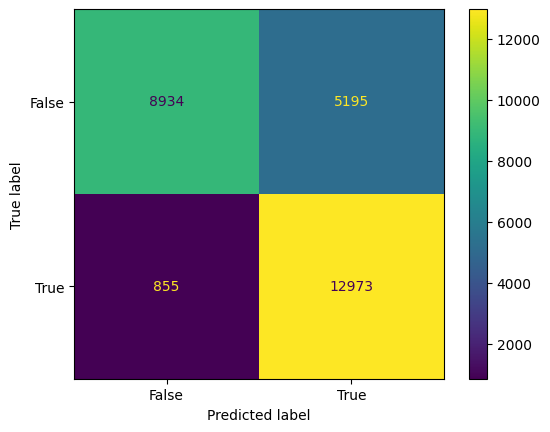

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = test['label_full'].to_list()
prediction = docs = test['predicted'].to_list()

confusion_matrix = metrics.confusion_matrix(actual, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
TP=12973
TN=8934
FP=5195
FN=855

ACC=(TP+TN)/(TP+FP+TN+FN)

error=1-ACC

# Recall is also called as True Positive rate or Sensitivity
recall=TP/(TP+FN)

# Precision is the actual positive out of all the samples marked as positive
precision=TP/(TP+FP)

# F1 score is the harmonic mean between precision and recall
f1_score=(2*precision*recall)/(precision+recall)

false_positive_rate=FP/(FP+TN)

# True Negative Rate is also called Specificity
true_negative_rate=TN/(TN+FP)

false_negative_rate=FN/(TP+FN)




print('accuracy:',ACC)
print('recall:',recall)
print('precision: ',precision)
print('F1: ', f1_score )

accuracy: 0.7835962370783703
recall: 0.9381689326005207
precision:  0.7140576838397182
F1:  0.810913864233029


### Real World Application

In [ ]:
import smtplib
from datetime import date
from datetime import datetime

In [ ]:
#@title User Details

Name = Sam Thomas #@param{type:"raw"}
DOB = '2007-07-20' #@param{type:"date"}
Age = 16 #@param{type:"slider",min: 5, max:75,step:1}
Email_ID = Lucy123@gmail.com #@param{type:"raw"}
Test_Text = bad memories keep playing in head. Felt very sad. Do not talk to me. #@param{type:"raw"}

In [ ]:
print(type(Test_Text))

<class 'str'>


In [ ]:
pred= clf.predict([Test_Text])

In [ ]:
print(pred)

['Poisonous']


If text is poisonous to mental health and user's age is < 18 then an email is sent to the parent. Else a help is provided directly to the user.

In [ ]:
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(dt_string)

12/12/2023 06:03:35


In [ ]:
if Age<18 and pred[0]=='Poisonous':
  dt='12/12/2023 06:03:35'
  now = datetime.now()
  dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
  # creates SMTP session
  s = smtplib.SMTP('smtp.gmail.com', 587)

  # start TLS for security
  s.starttls()

  # Authentication
  s.login("andradeisha@gmail.com", password)
  #sender id and password were removed for privacy

  # message to be sent
  message='Dear parent/guardian/owner,\nWe noticed some concerning activity on your ward\'s/your device.\nText: '+ Test_Text + 'Date and Time: '+dt+ '\nIf you require assistance, please consult the link below to find a helpline most suited to your needs.\n🔗link: https://www.helpguide.org/find-help.htm\nRemember🎗️, let them know they are not alone🌻\nIt is okay to ask for help. Show your support to your loved ones💚'

  # sending the mail
  s.sendmail("andradeisha@gmail.com", Email_ID, message)

  # terminating the session
  s.quit()

else:
  message='Hey there,\nWe noticed some concerning activity on your device.If you require assistance, \nplease consult the link below to find a helpline most suited to your needs.\n🔗link: https://www.helpguide.org/find-help.htm\nRemember🎗️, you are not alone🌻\nIt is okay to ask for help💚'
  print(message)

In [ ]:
message='Hey there,\nWe noticed some concerning activity on your device.If you require assistance, \nplease consult the link below to find a helpline most suited to your needs.\n🔗link: https://www.helpguide.org/find-help.htm\nRemember🎗️, you are not alone🌻\nIt is okay to ask for help💚'
print(message)

Hey there,
We noticed some concerning activity on your device.If you require assistance, 
please consult the link below to find a helpline most suited to your needs.
🔗link: https://www.helpguide.org/find-help.htm
Remember🎗️, you are not alone🌻
It is okay to ask for help💚
